### Car price prediction is a major research topic in machine learning. It's based on finance and marketing, and is a key area of research because car prices depend on many factors.
- https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset
### Key features:

- Car_Name: Identify the brand or company name along with the specific model of each vehicle.
- Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- Selling_Price: Selling price of car
- Present_Price: Current origin price of car
- Kms_Driven: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- Fuel_Type: Learn about the type of fuel the vehicles run on, whether it's petrol or diesel.
- Seller_Type: Seller type weather dealer or individual
- Transmission: Determine the transmission type, whether automatic, manual, or another variant.
- Owner: How many owner of car (0, 1, 2, or 3)

In [1]:
import pandas as pd
df = pd.read_csv('car_prediction_data.csv')
print('\nShape:', df.shape)
df.head(3)


Shape: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
for i in df.columns[[1,5,6,7,8]]:
    print('-'*20)
    print(i)
    print(df[i].unique())

--------------------
Year
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
--------------------
Fuel_Type
['Petrol' 'Diesel' 'CNG']
--------------------
Seller_Type
['Dealer' 'Individual']
--------------------
Transmission
['Manual' 'Automatic']
--------------------
Owner
[0 1 3]


In [5]:
df['Car_age'] = 2023 - df['Year']
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6


In [6]:
colunas = df.columns[2:]
df2 = df[colunas]
df2.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6


In [7]:
df2 = pd.get_dummies(df2, drop_first=True)
df2.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True


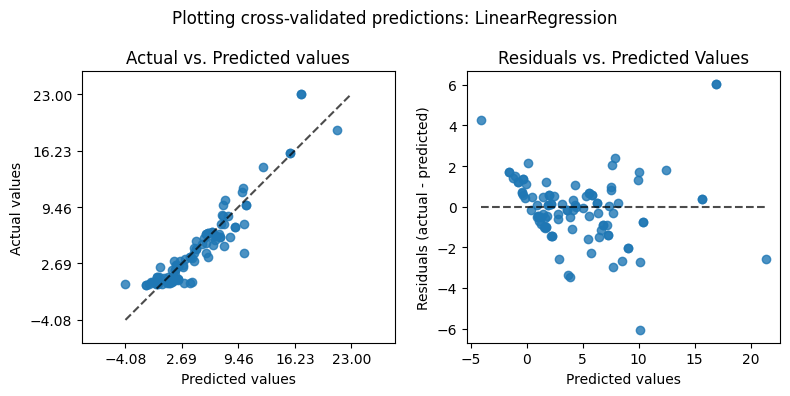

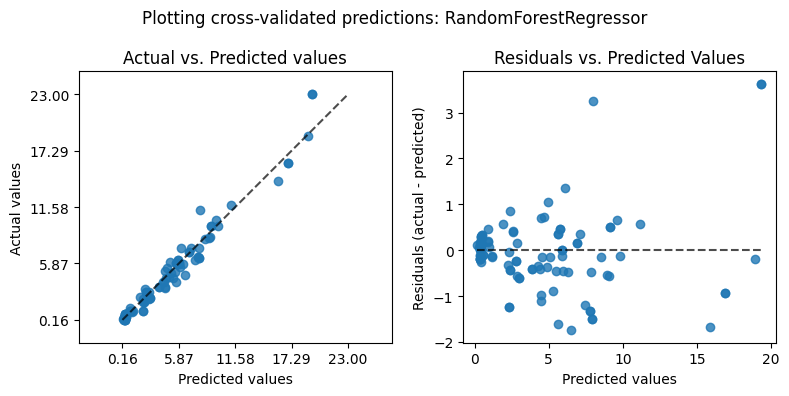

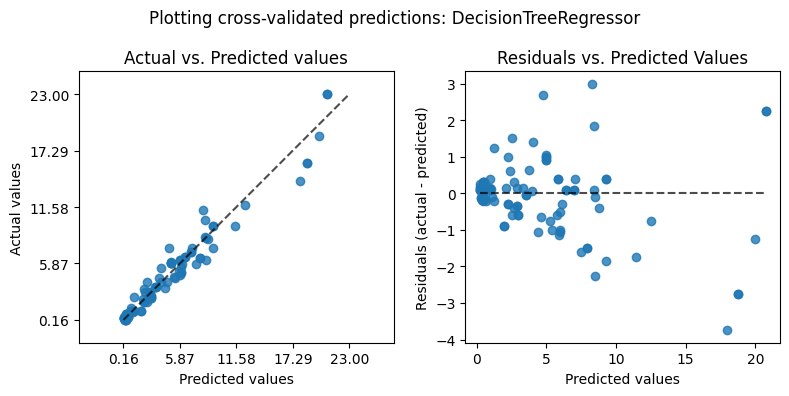

In [8]:
# Analyzing the model with cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt


# Separating X and Y
X = df2.drop(columns='Selling_Price')
y = df2.Selling_Price

# Getting the scaler
scaler = StandardScaler()

# Models list
modelos = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]

for modelo in modelos:
    scaler.fit_transform(X)
    modelo.fit(X, y)
    y_pred = cross_val_predict(modelo, X, y, cv=10)
    fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
    PredictionErrorDisplay.from_predictions(y, y_pred=y_pred, 
                                            kind="actual_vs_predicted", 
                                            subsample=100, ax=axs[0], random_state=0,)
    axs[0].set_title("Actual vs. Predicted values")
    PredictionErrorDisplay.from_predictions(y, y_pred=y_pred, 
                                            kind="residual_vs_predicted", 
                                            subsample=100, ax=axs[1], random_state=0,)
    axs[1].set_title("Residuals vs. Predicted Values")
    fig.suptitle(f"Plotting cross-validated predictions: {type(modelo).__name__}")
    plt.tight_layout()
    plt.show()

In [9]:
# Analyzing the model with cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Separating X and Y
X = df2.drop(columns='Selling_Price')
y = df2.Selling_Price

# Models list
modelos = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]
scalers = [MinMaxScaler(), StandardScaler()]

for modelo in modelos:
    for scaler in scalers:
        X_sscaler = scaler.fit_transform(X)
        # Use cross_val_predict para obter previsões cross-validated
        y_pred = cross_val_predict(modelo, X_sscaler, y, cv=5)  # cv é o número de folds para cross-validation

        # Calcule as métricas para cada fold
        mse_scores = mean_squared_error(y, y_pred)
        r2_scores = r2_score(y, y_pred)
        mae_scores = mean_absolute_error(y, y_pred)

        # Calcule as médias das métricas
        avg_mse = mse_scores.mean()
        avg_r2 = r2_scores.mean()
        avg_mae = mae_scores.mean()
        print("-"*60)
        print(f'Modelo                            : {type(modelo).__name__}')
        print(f'Scaler                            : {type(scaler).__name__}')
        print(f'Média do Mean Squared Error (MSE) : {avg_mse}')
        print(f'Média do R2 Score                 : {avg_r2}')
        print(f'Média do Mean Absolute Error (MAE): {avg_mae}')


------------------------------------------------------------
Modelo                            : LinearRegression
Scaler                            : MinMaxScaler
Média do Mean Squared Error (MSE) : 5.019195958511227
Média do R2 Score                 : 0.805073279922354
Média do Mean Absolute Error (MAE): 1.4569138642138508
------------------------------------------------------------
Modelo                            : LinearRegression
Scaler                            : StandardScaler
Média do Mean Squared Error (MSE) : 8.615044501598813e+23
Média do R2 Score                 : -3.3457597230727026e+22
Média do Mean Absolute Error (MAE): 75658985329.44821
------------------------------------------------------------
Modelo                            : RandomForestRegressor
Scaler                            : MinMaxScaler
Média do Mean Squared Error (MSE) : 3.7681454282059783
Média do R2 Score                 : 0.8536593838600324
Média do Mean Absolute Error (MAE): 0.8634162790697677
----

In [10]:
df2.shape

(301, 9)

In [11]:
df3 = df2.sample(10, random_state=10)
df3.shape

(10, 9)

In [12]:
df4 = df2.drop(index=df3.index)
df4.shape

(291, 9)

In [13]:
# Based on the data fit, we choose the model
#separating a sample of data 10 records to validate the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Separating X and Y
X = df4.drop(columns='Selling_Price')
y = df4.Selling_Price

# Separating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardizing data
scaler = StandardScaler()
modelo = RandomForestRegressor()
X_train_escalado = scaler.fit_transform(X_train)
X_test_escalado  = scaler.fit_transform(X_test)

# Model
modelo.fit(X_train_escalado, y_train)
y_pred = modelo.predict(X_test_escalado)

print(f'Modelo             :  {type(modelo).__name__}')
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score           : ', r2_score(y_test, y_pred))


Modelo             :  RandomForestRegressor
mean_absolute_error:  1.1697438356164385
mean_squared_error :  4.703264863972597
r2_score           :  0.8157882457578914


In [14]:

# Validating data with new data
X_val = df3.drop(columns='Selling_Price')
y_val = pd.DataFrame(df3.Selling_Price)
# Standardizing data
X_val_escalado = scaler.fit_transform(X_val)
# Predicting the data
y_pred_val = modelo.predict(X_val_escalado)
# transforming into dataframe
y_pred_val = pd.DataFrame(y_pred_val, columns=['Predict_Price'])

In [15]:
# Presenting predicted data and comparing with actual prices
df3.reset_index(drop=True, inplace=True)
df5 = pd.concat([df3, y_pred_val], axis=1)
df5[['Selling_Price','Predict_Price']]

,Selling_Price,Predict_Price
0,8.40,8.2510
1,0.50,1.6645
2,2.55,2.8790
3,0.90,1.6805
4,4.80,5.5710
5,4.75,5.5345
6,19.99,19.6925
7,0.20,1.0260
8,0.75,1.2075
9,3.90,4.0755
